In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from stravalib import unithelper
import seaborn as sea

In [2]:
df = pd.read_csv("data/activities.csv")

pd.set_option("display.max_columns", None)


## Clean up data

In [3]:
# sorts values by date (descending order) then drops duplicates

df.drop_duplicates(subset=["start_date_local"], inplace=True)
df["start_date_local"] = pd.to_datetime(df["start_date_local"])


Fill Empty Values

In [4]:
df["achievement_count"].fillna(0, inplace=True)

In [5]:
df["pr_count"].fillna(0, inplace=True)

Start to Convert Units

In [6]:
df["distance"] = df["distance"].apply(lambda x: round(x * 0.00062137, 2))

In [7]:
df["average_temp"] = df["average_temp"].apply(lambda x: round((9/5 * x) + 32, 0))

In [8]:
df["max_speed"] = df["max_speed"].apply(lambda x: x * 2.237)

In [9]:
df["average_speed"] = df["average_speed"].apply(lambda x: x * 2.237)

In [10]:
df["elapsed_time"] = df["elapsed_time"].apply(lambda x: (x / 60))

In [11]:
df["shoe_distance"] = df.groupby("gear")["distance"].cumsum()

split dfs into run and non running dfs

In [12]:
df_nonrun = df.loc[df["type"] != "Run"]

In [13]:
df_run = df.loc[df["type"] == "Run"]

In [14]:
df.sort_values(by="start_date_local", ascending=False, inplace=True)
# Resets index then drops classic Unnamed: 0 row
df.reset_index(drop=True, inplace=True)
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,achievement_count,average_cadence,average_heartrate,average_speed,average_temp,average_watts,best_efforts,calories,device_name,distance,elapsed_time,gear,kilojoules,laps,map,max_heartrate,max_speed,max_watts,moving_time,name,pr_count,sport_type,start_date_local,suffer_score,type,weighted_average_watts,shoe_distance
0,0.0,73.4,140.1,4.402416,84.0,306.7,5.0,471.0,Garmin Forerunner 265,3.03,41.300000,Brooks Ghost 15 Brooks Ghost,759.9,4,meumFl}rcO?OGKIAGDU?k@Ky@WGECG^cBHONy@Ne@F?fAd...,160.0,6.071218,434.0,2478,Morning Run,0.0,Run,2023-07-15 09:46:18,29.0,Run,313.0,197.10
1,0.0,71.1,125.7,4.019889,90.0,274.1,5.0,287.0,Garmin Forerunner 265,2.01,30.183333,Brooks Ghost 15 Brooks Ghost,493.4,3,sjumFpzrcOW\?PHHD@NCr@\hAHLLLAFM?SKII?WDUEU?_A...,143.0,5.771460,389.0,1800,Morning Run,0.0,Run,2023-07-14 10:48:42,7.0,Run,279.0,194.07
2,1.0,71.9,148.4,4.156346,93.0,284.6,7.0,994.0,Garmin Forerunner 265,6.29,90.983333,Brooks Ghost 15 Brooks Ghost,1551.6,7,gkumFtzrcO@DGN?H@FJJF@PARJp@Pl@JNHJ@HGDOAIMM_@...,168.0,17.788624,462.0,5451,Morning Run,0.0,Run,2023-07-13 10:42:53,116.0,Run,293.0,192.06
3,0.0,74.2,147.7,4.415838,95.0,313.4,6.0,793.0,Garmin Forerunner 265,4.85,66.166667,Brooks Ghost 15 Brooks Ghost,1238.3,6,ekumFvzrcOGT@LFJTAbA\r@HPLH?JIBSKOG?SD_AKs@WEE...,163.0,6.782584,452.0,3951,Lunch Run,0.0,Run,2023-07-12 11:06:32,84.0,Run,322.0,185.77
4,0.0,73.6,147.8,4.605983,91.0,323.1,5.0,457.0,Garmin Forerunner 265,2.80,36.616667,Brooks Ghost 15 Brooks Ghost,705.9,25,akumFtzrcO?DGP?J?FFD`@@XPrAPRLHAJGBOOQEA[Fy@IW...,181.0,8.581132,785.0,2185,Morning Run,0.0,Run,2023-07-11 10:57:55,48.0,Run,363.0,180.92


## Graphs

In [15]:
df.loc[df["name"].str.contains("Run")]["name"].value_counts()

Lunch Run        94
Morning Run      37
Afternoon Run    19
Night Run         5
Evening Run       1
Name: name, dtype: int64

<Axes: ylabel='type'>

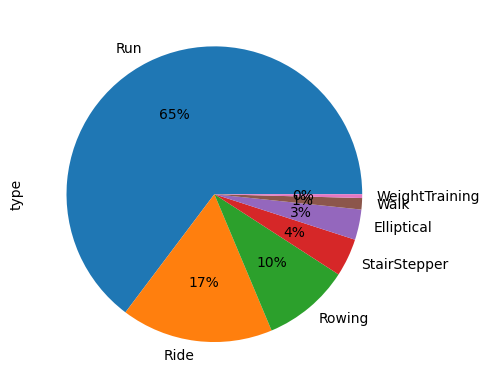

In [16]:
fig, ax = plt.subplots(1)
df["type"].value_counts().plot(kind="pie", autopct="%.0f%%", ax=ax)
# ax.legend(loc="upper left")
# 

Text(0, 0.5, 'Shoe Name')

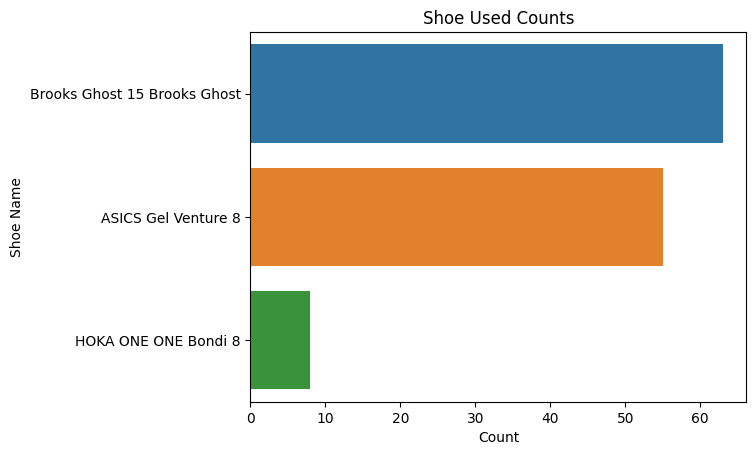

In [17]:
fig, ax = plt.subplots(1)
shoe_counts = df["gear"].value_counts().reset_index()
sea.barplot(data=shoe_counts, x="gear", y="index")
ax.set_title("Shoe Used Counts")
ax.set_xlabel("Count")
ax.set_ylabel("Shoe Name")

Text(0, 0.5, 'Shoe Name')

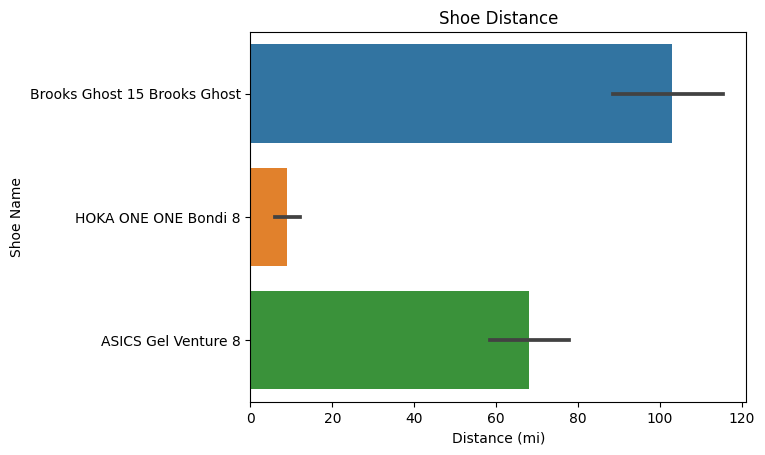

In [18]:
fig, ax = plt.subplots(1)
sea.barplot(data=df, x="shoe_distance", y="gear")
ax.set_title("Shoe Distance")
ax.set_xlabel("Distance (mi)")
ax.set_ylabel("Shoe Name")

Text(0.5, 0, 'Distance (mi)')

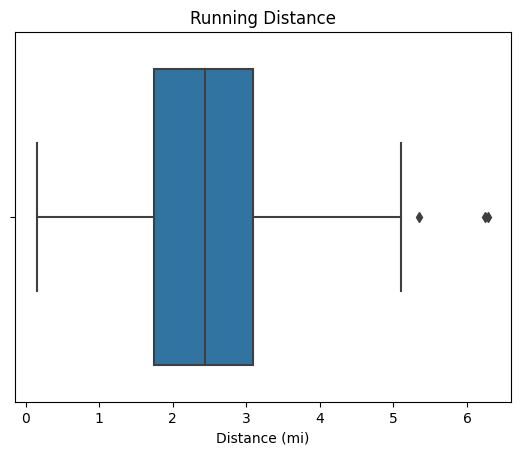

In [19]:
%matplotlib inline
fig, ax = plt.subplots(1)
sea.boxplot(data=df_run, x="distance")
ax.set_title("Running Distance")
ax.set_xlabel("Distance (mi)")


Text(0.5, 0, 'Distance (mi)')

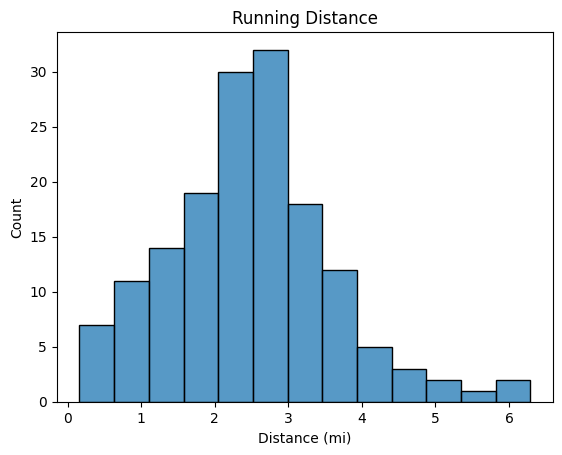

In [20]:
%matplotlib inline
fig, ax = plt.subplots(1)
sea.histplot(data=df_run, x="distance")
ax.set_title("Running Distance")
ax.set_xlabel("Distance (mi)")


Text(0.5, 0, 'Speed (mph)')

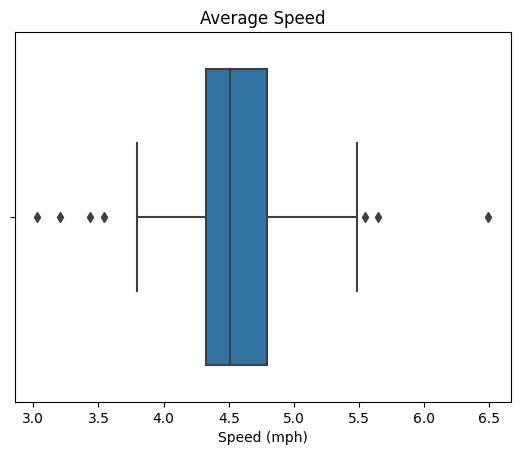

In [21]:
fig, ax = plt.subplots(1)
sea.boxplot(data=df_run, x="average_speed")
ax.set_title("Average Speed")
ax.set_xlabel("Speed (mph)")

Text(0, 0.5, 'Frequency')

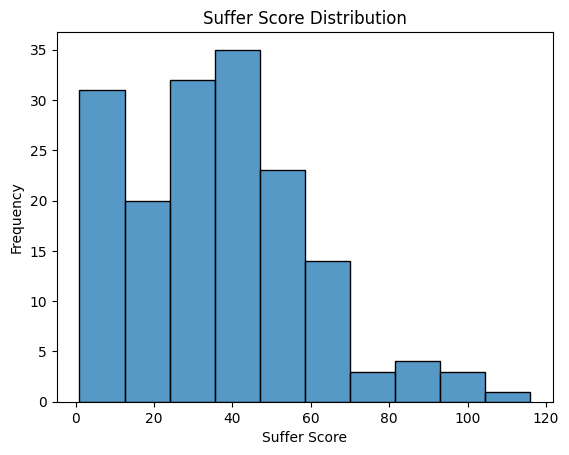

In [22]:
fig, ax = plt.subplots(1)
sea.histplot(data=df, x='suffer_score')
ax.set_title("Suffer Score Distribution")
ax.set_xlabel("Suffer Score")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Suffer Score')

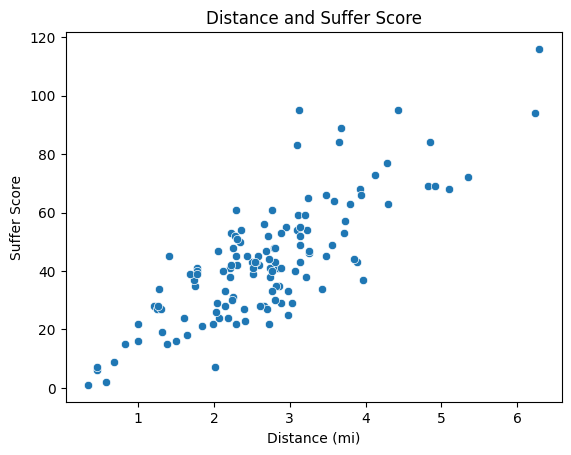

In [23]:
fig, ax = plt.subplots(1)
sea.scatterplot(data=df_run, x="distance", y="suffer_score", )
ax.set_title("Distance and Suffer Score")
ax.set_xlabel("Distance (mi)")
ax.set_ylabel("Suffer Score")

Text(0, 0.5, 'Frequency')

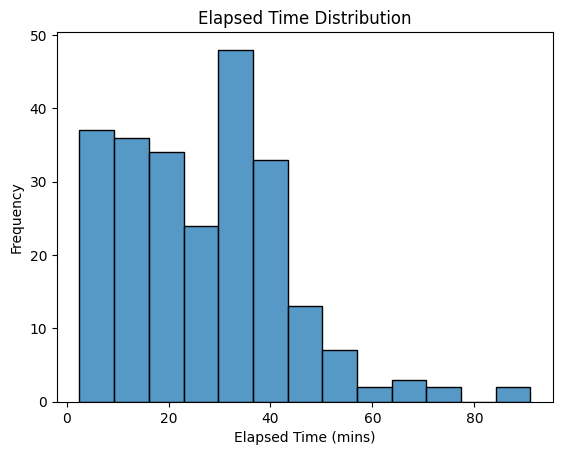

In [24]:
fig, ax = plt.subplots(1)
sea.histplot(data=df, x='elapsed_time')
ax.set_title("Elapsed Time Distribution")
ax.set_xlabel("Elapsed Time (mins)")
ax.set_ylabel("Frequency")

In [25]:
df.to_csv("data/activities_updated.csv")